In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

In [11]:
df = pd.read_csv('mbti.csv')

In [12]:
# converting all to lower case 
df['posts'] = [i.lower() for i in df['posts']]

In [13]:
df['posts'].head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one  _____   https://www.youtube.com/wat...
3    'dear intp,   i enjoyed our conversation the o...
4    'you're fired.|||that's another silly misconce...
Name: posts, dtype: object

In [14]:
no_groups = df.groupby('type').count()

<AxesSubplot:xlabel='type'>

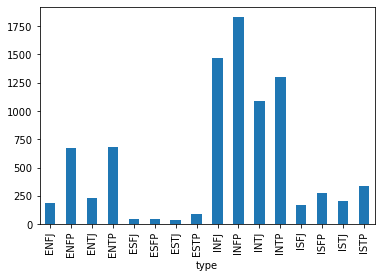

In [15]:
no_groups['posts'].plot(kind= 'bar')

In [16]:
df['Distinct Posts'] = [i.split('|||') for i in df['posts']]

In [17]:
df['Number of posts'] = df['Distinct Posts'].apply(len)
df.drop('Distinct Posts',inplace=True,axis=1)

In [18]:
df = df[df['Number of posts']==50]

In [19]:
#removing urls
df['Posts']= df['posts'].apply(lambda x: re.sub(r'https?:[?:A-Za-z0-9//_?.=/-]+', '', x.replace('|','')))
#keeping the end of strings
#removing punctuation marks
df['Posts']=df['Posts'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing numbers and alphanumeric characters
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
# removing special symbols
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'[0-9,."\'*.?/\()@#!$%&^+]', '', x))
# removing repetitive multiple letter words and too long or too short words
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
#df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'\s[\s+]','',x))
df.drop('posts',inplace=True,axis=1)
df.to_csv('mbti_cleaned.csv')

In [20]:
data = pd.read_csv('mbti_cleaned.csv')
x = data['type']
data.drop(['Unnamed: 0', 'type'], axis = 1,inplace = True)
data['type'] = x
data

,Number of posts,Posts,type
0,50,intj moments sportscenter plays pra...,INFJ
1,50,finding lack these posts very alarmingsex...,ENTP
2,50,good course which know thats blessi...,INTP
3,50,dear intp enjoyed conversation other es...,INTJ
4,50,youre firedthats another silly misconception t...,ENTJ
...,...,...,...
7582,50,just because always think cats doms some...,ISFP
7583,50,soif this thread already exists someplace else...,ENFP
7584,50,many questions when these things would ta...,INTP
7585,50,very conflicted right when comes wanting ...,INFP


In [21]:
data.dropna(inplace= True)

In [22]:
# Creating a dataframe wherein each person and his personality type is a row and all the posts by him are the columns 
l2 = list(set(data['type']))
d = {}
count = 0
for ptype in l2:
    d[ptype] = ''
for pertype in data['type']:
    d[pertype] = d[pertype]+" "+ data.iloc[count,1]
    count+=1
   

In [23]:
new_data = pd.DataFrame()
for i in d.keys():
    new_data.loc[i,'Posts']= d[i]
new_data

,Posts
INFJ,intj moments sportscenter plays pr...
ISFJ,love feeling affectionate love care c...
ISTJ,newtons universal gravity mean seriously wh...
ENTJ,youre firedthats another silly misconception ...
INTP,good course which know thats bless...
ESTJ,this such catch here although quite ter...
ESFJ,just curious dont many esfj here esfj ...
INTJ,dear intp enjoyed conversation other e...
ISTP,from what read about enneagram thoug...
ESFP,pretty sure theyve mistyped several tmlt ...


In [24]:
new_data['Cat_id'] = range(1,17)
new_data

,Posts,Cat_id
INFJ,intj moments sportscenter plays pr...,1
ISFJ,love feeling affectionate love care c...,2
ISTJ,newtons universal gravity mean seriously wh...,3
ENTJ,youre firedthats another silly misconception ...,4
INTP,good course which know thats bless...,5
ESTJ,this such catch here although quite ter...,6
ESFJ,just curious dont many esfj here esfj ...,7
INTJ,dear intp enjoyed conversation other e...,8
ISTP,from what read about enneagram thoug...,9
ESFP,pretty sure theyve mistyped several tmlt ...,10


In [25]:
#TF-IDF MODEL
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf  = TfidfVectorizer(sublinear_tf=True,min_df=5, ngram_range=(1, 2), stop_words='english')

In [27]:
X = tfidf.fit_transform(new_data['Posts']).toarray()

In [31]:
print(X)

[[0.         0.0043763  0.00258471 ... 0.00654132 0.00494285 0.00238954]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00585944 0.         0.         ... 0.         0.0050792  0.        ]
 ...
 [0.00648296 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00400914 ... 0.00344417 0.00321286 0.        ]
 [0.         0.00580219 0.         ... 0.00843956 0.         0.00536406]]
